# Assignment #A: 递归回溯、🌲 (3/4)

Updated 2203 GMT+8 Nov 3, 2025

2025 fall, Complied by <mark>胡孝齐 物理学院</mark>





>**说明：**
>
>1. **解题与记录：**
>
>     对于每一个题目，请提供其解题思路（可选），并附上使用Python或C++编写的源代码（确保已在OpenJudge， Codeforces，LeetCode等平台上获得Accepted）。请将这些信息连同显示“Accepted”的截图一起填写到下方的作业模板中。（推荐使用Typora https://typoraio.cn 进行编辑，当然你也可以选择Word。）无论题目是否已通过，请标明每个题目大致花费的时间。
>
>2. **提交安排：**提交时，请首先上传PDF格式的文件，并将.md或.doc格式的文件作为附件上传至右侧的“作业评论”区。确保你的Canvas账户有一个清晰可见的本人头像，提交的文件为PDF格式，并且“作业评论”区包含上传的.md或.doc附件。
> 
>3. **延迟提交：**如果你预计无法在截止日期前提交作业，请提前告知具体原因。这有助于我们了解情况并可能为你提供适当的延期或其他帮助。  
>
>请按照上述指导认真准备和提交作业，以保证顺利完成课程要求。



## 1. 题目

### T51.N皇后

backtracking, https://leetcode.cn/problems/n-queens/

思路：
做麻烦了，如果使用和、差、行的值这三个集合来判断是否可以放置会更方便，速度会快很多。


代码：

```python
class Solution:
    def solveNQueens(self, n: int) -> List[List[str]]:
        visited=[[False]*n for _ in range(n)]
        ans=[]
        def dfs(i,visited,path):
            if i==n:
                ans.append(path)
                return
            for j in range(n):
                if not visited[i][j]:
                    visited2=copy.deepcopy(visited)
                    k=1
                    while k+i<n:
                        if j+k<n:
                            visited2[i+k][j+k]=True
                        if j-k>=0:
                            visited2[i+k][j-k]=True
                        visited2[i+k][j]=True
                        k+=1
                    dfs(i+1,visited2,path+str(j))
        
        dfs(0,visited,'')
        l=[]
        s=['.']*n
        for i in range(len(ans)):
            l1=[]
            for j in range(n):
                s2=s.copy()
                num=int(ans[i][j])
                s2[num]='Q'
                l1.append(''.join(map(str,s2)))
            l.append(l1)
        return l
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
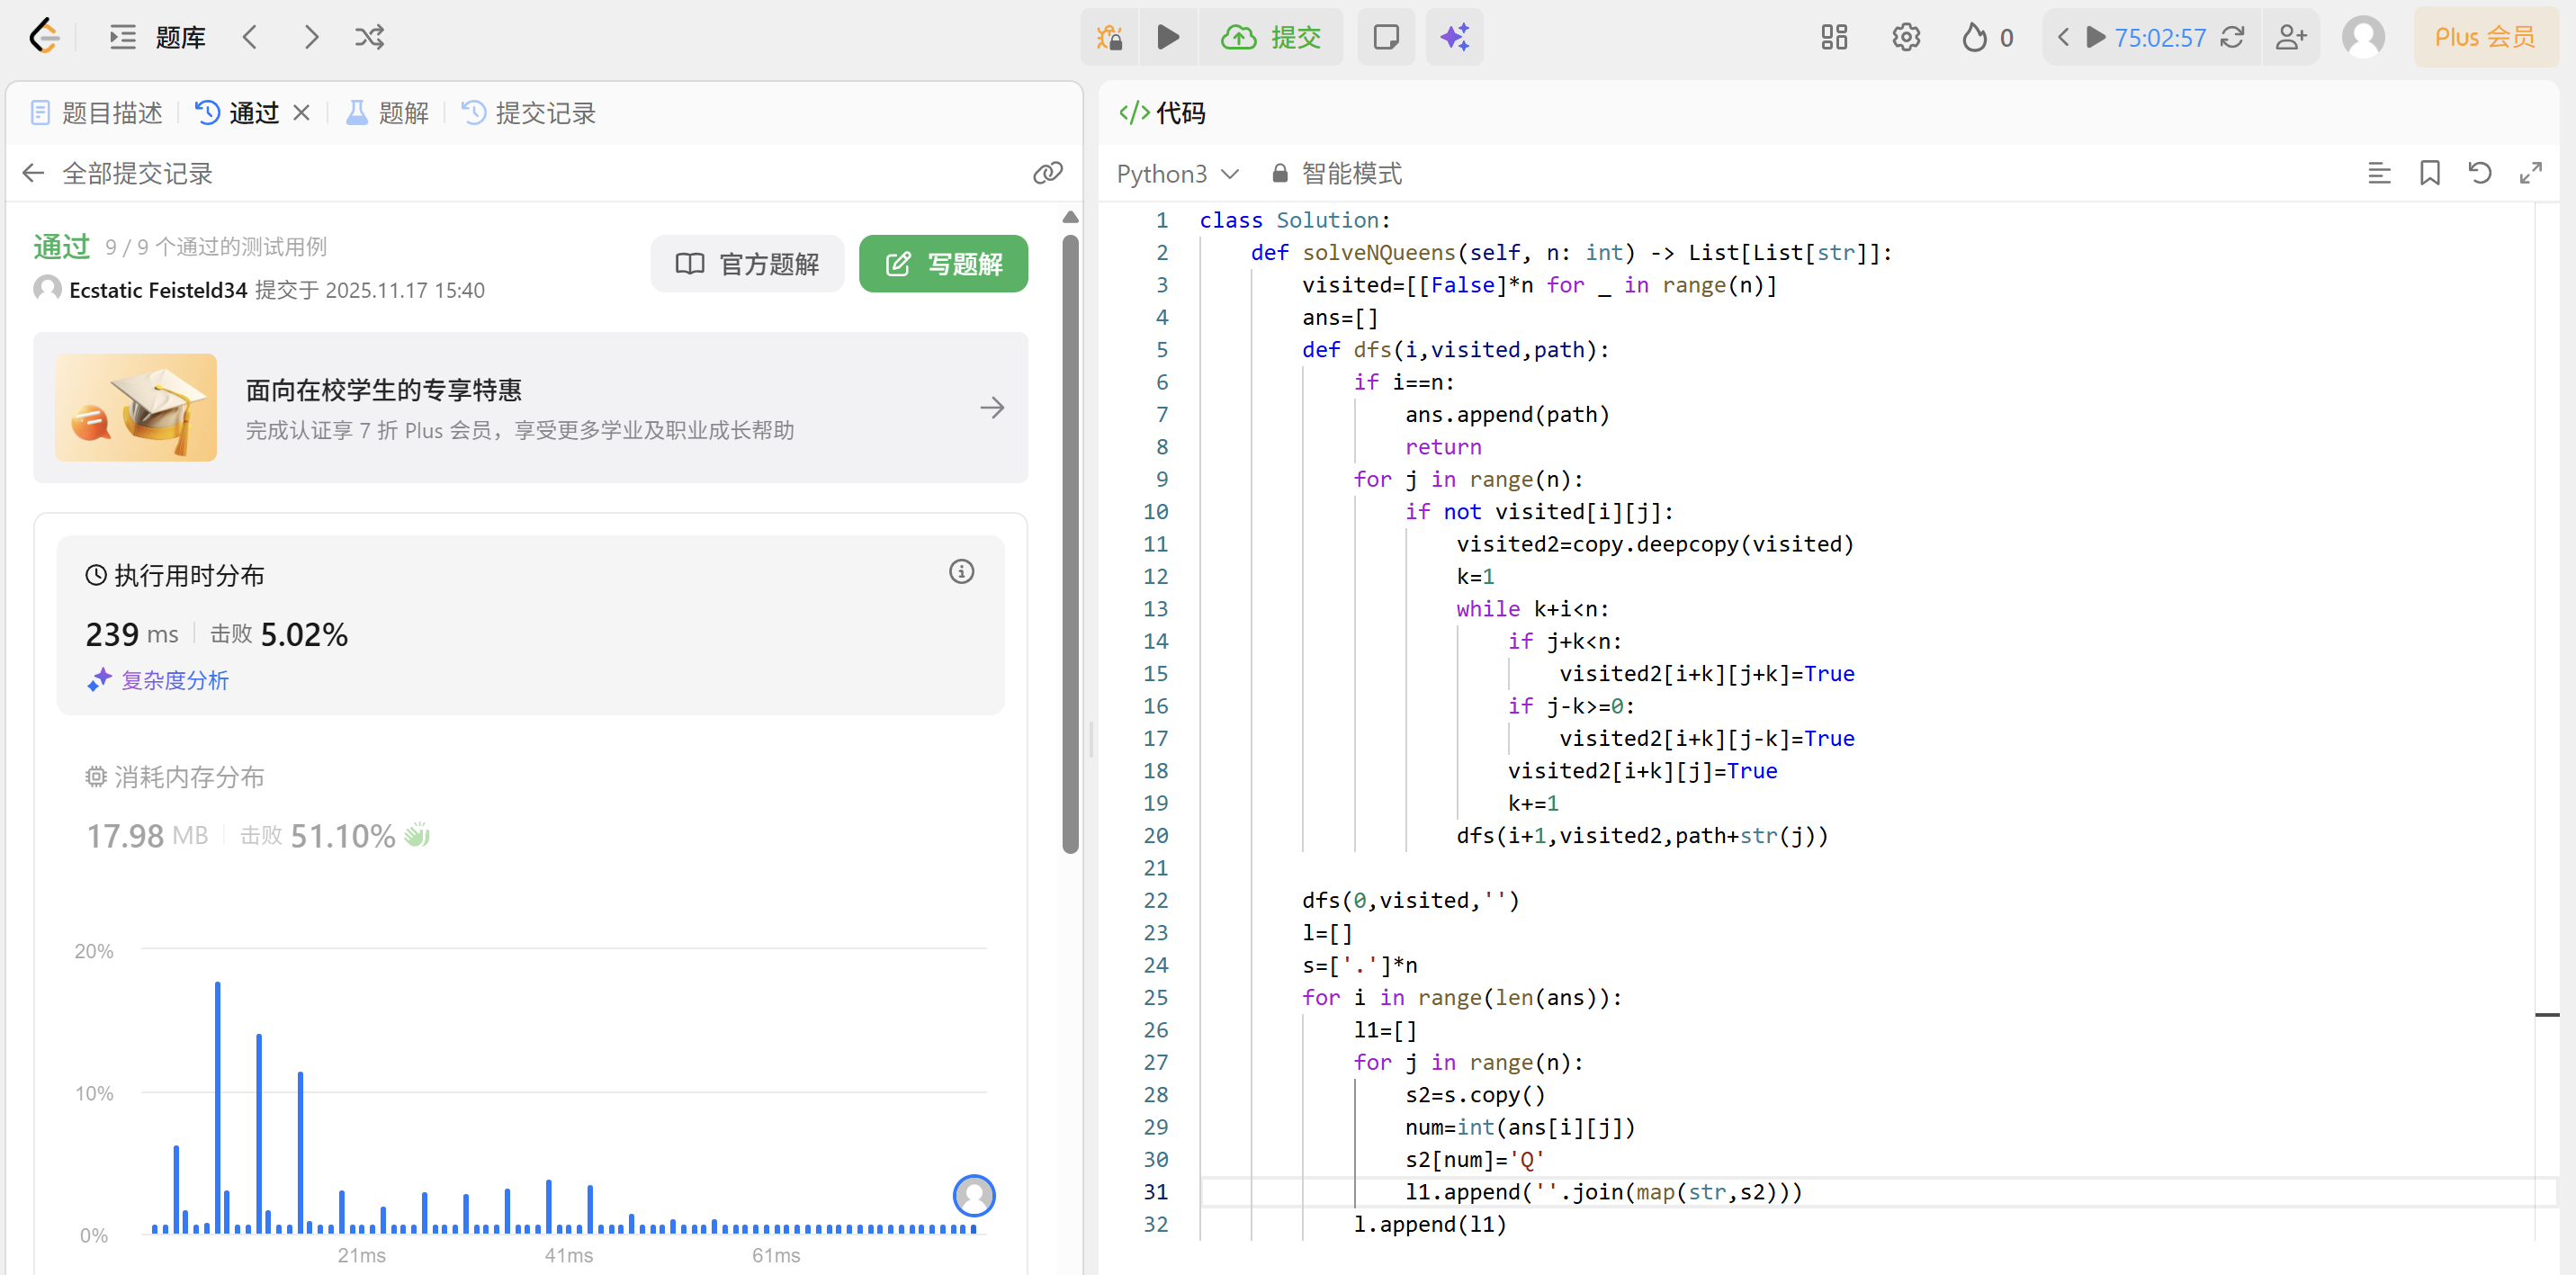




### M22275: 二叉搜索树的遍历

http://cs101.openjudge.cn/practice/22275/


思路：
本题隐藏了一个条件，就是数字的顺序代表中序遍历，因为二叉搜索树的中序遍历是从小到大的，然后这题和月考题一样，不过条件中最后一条和数据不匹配！！！最后改成index才过的。。。


代码：

```python
n=int(input().strip())
preorder=list(map(int,input().strip().split()))
inorder=[i+1 for i in range(n)]
def f(preorder,inorder):
    if len(preorder)==0:
        return []
    root = preorder[0]
    i=inorder.index(root)
    left_inorder=inorder[:i]
    right_inorder=inorder[i+1:]
    left_preorder=preorder[1:i+1]
    right_preorder=preorder[i+1:]
    left=f(left_preorder,left_inorder)
    right=f(right_preorder,right_inorder)
    return left+ right+[root]
print(*f(preorder,inorder))
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
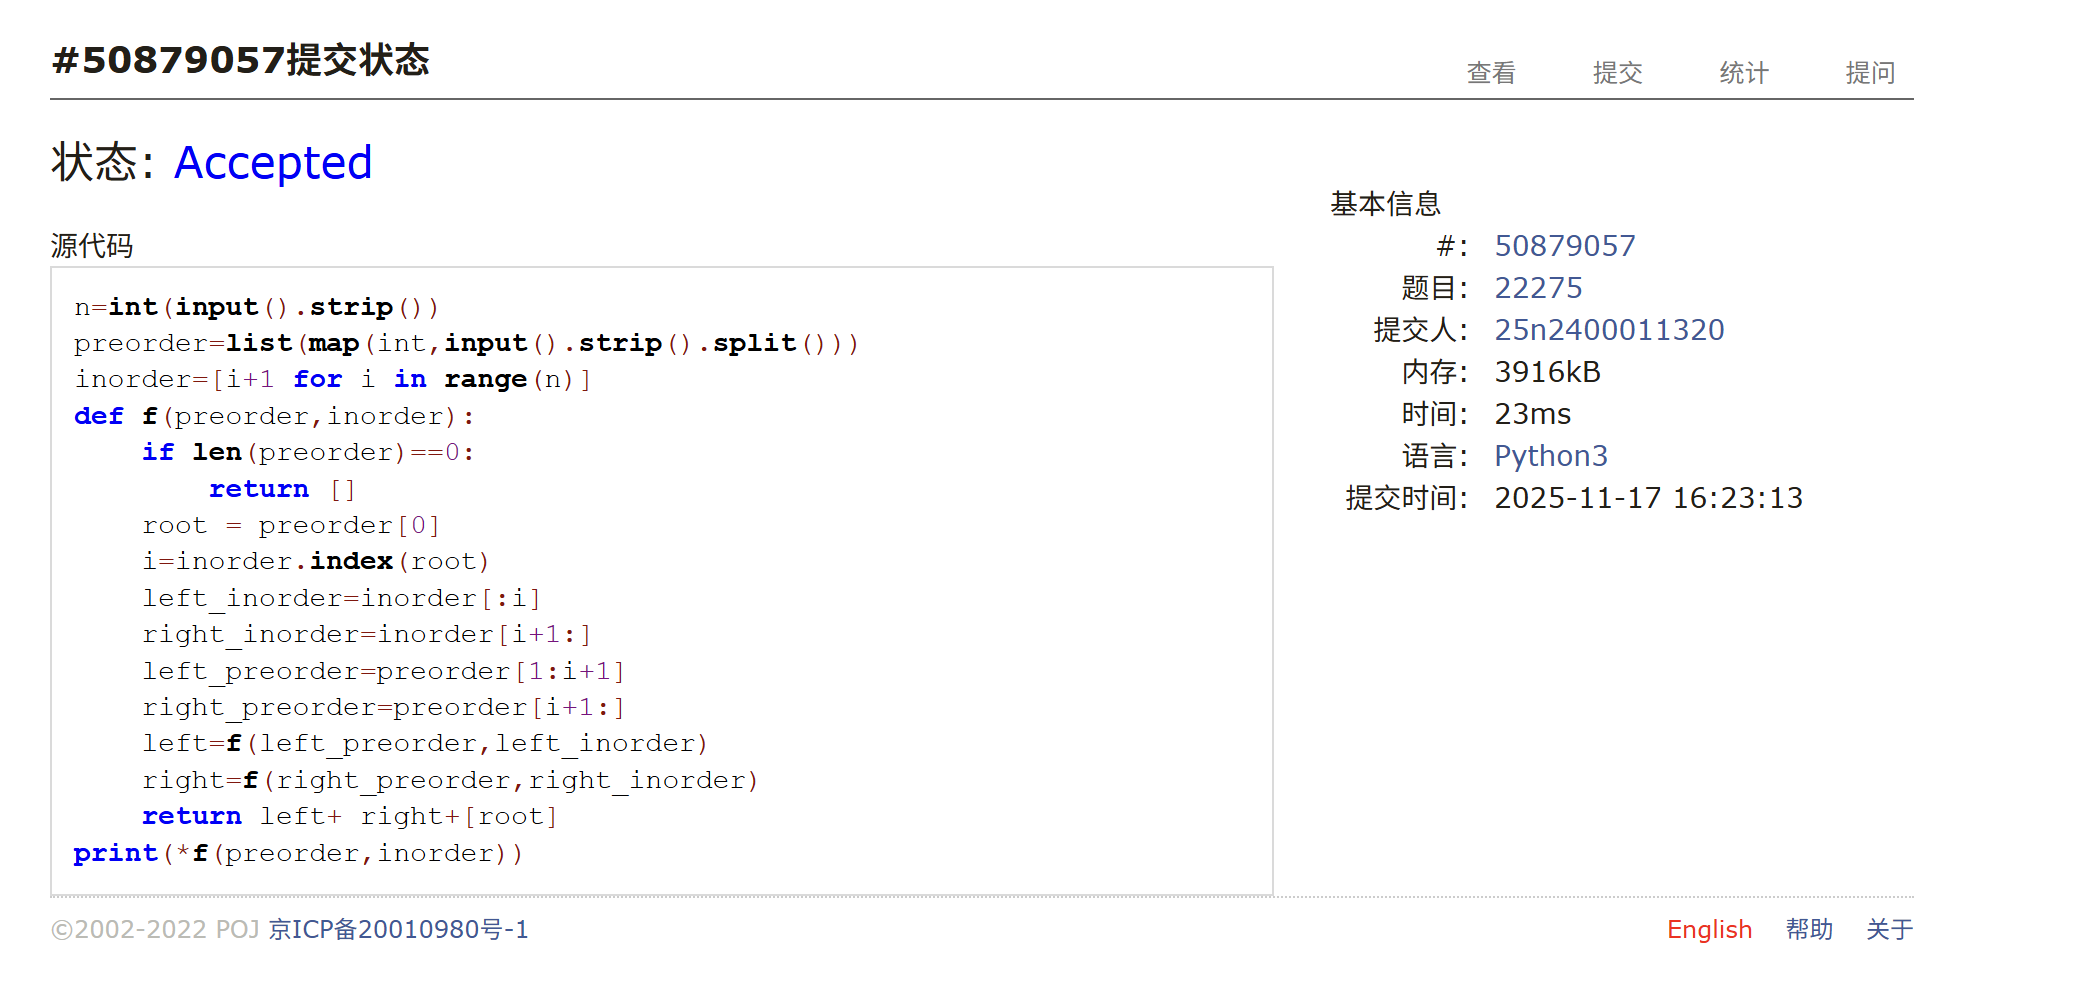




### M25145: 猜二叉树（按层次遍历）

http://cs101.openjudge.cn/practice/25145/

思路：
直接利用两个把二叉树构建出来，然后用deque实现逐层遍历


代码：

```python
from collections import deque
n=int(input().strip())
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def f(inorder,postorder):
    if not inorder:
        return None
    
    root=TreeNode(postorder[-1])
    i=inorder.index(root.val)

    left_inorder=inorder[:i]
    right_inorder=inorder[i+1:]

    left_postorder=postorder[:i]
    right_postorder=postorder[i:len(postorder)-1]

    root.left=f(left_inorder,left_postorder)
    root.right=f(right_inorder,right_postorder)
    return root


for _ in range(n):
    inorder=input().strip()
    postorder=input().strip()
    root=f(inorder,postorder)
    q=deque()
    q.append(root)
    output=''
    while q:
        num=len(q)
        for i in range(num):
            root=q.popleft()
            if root:
                output+=root.val
            if root.left:
                q.append(root.left)
            if root.right:
                q.append(root.right)
    print(output)
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
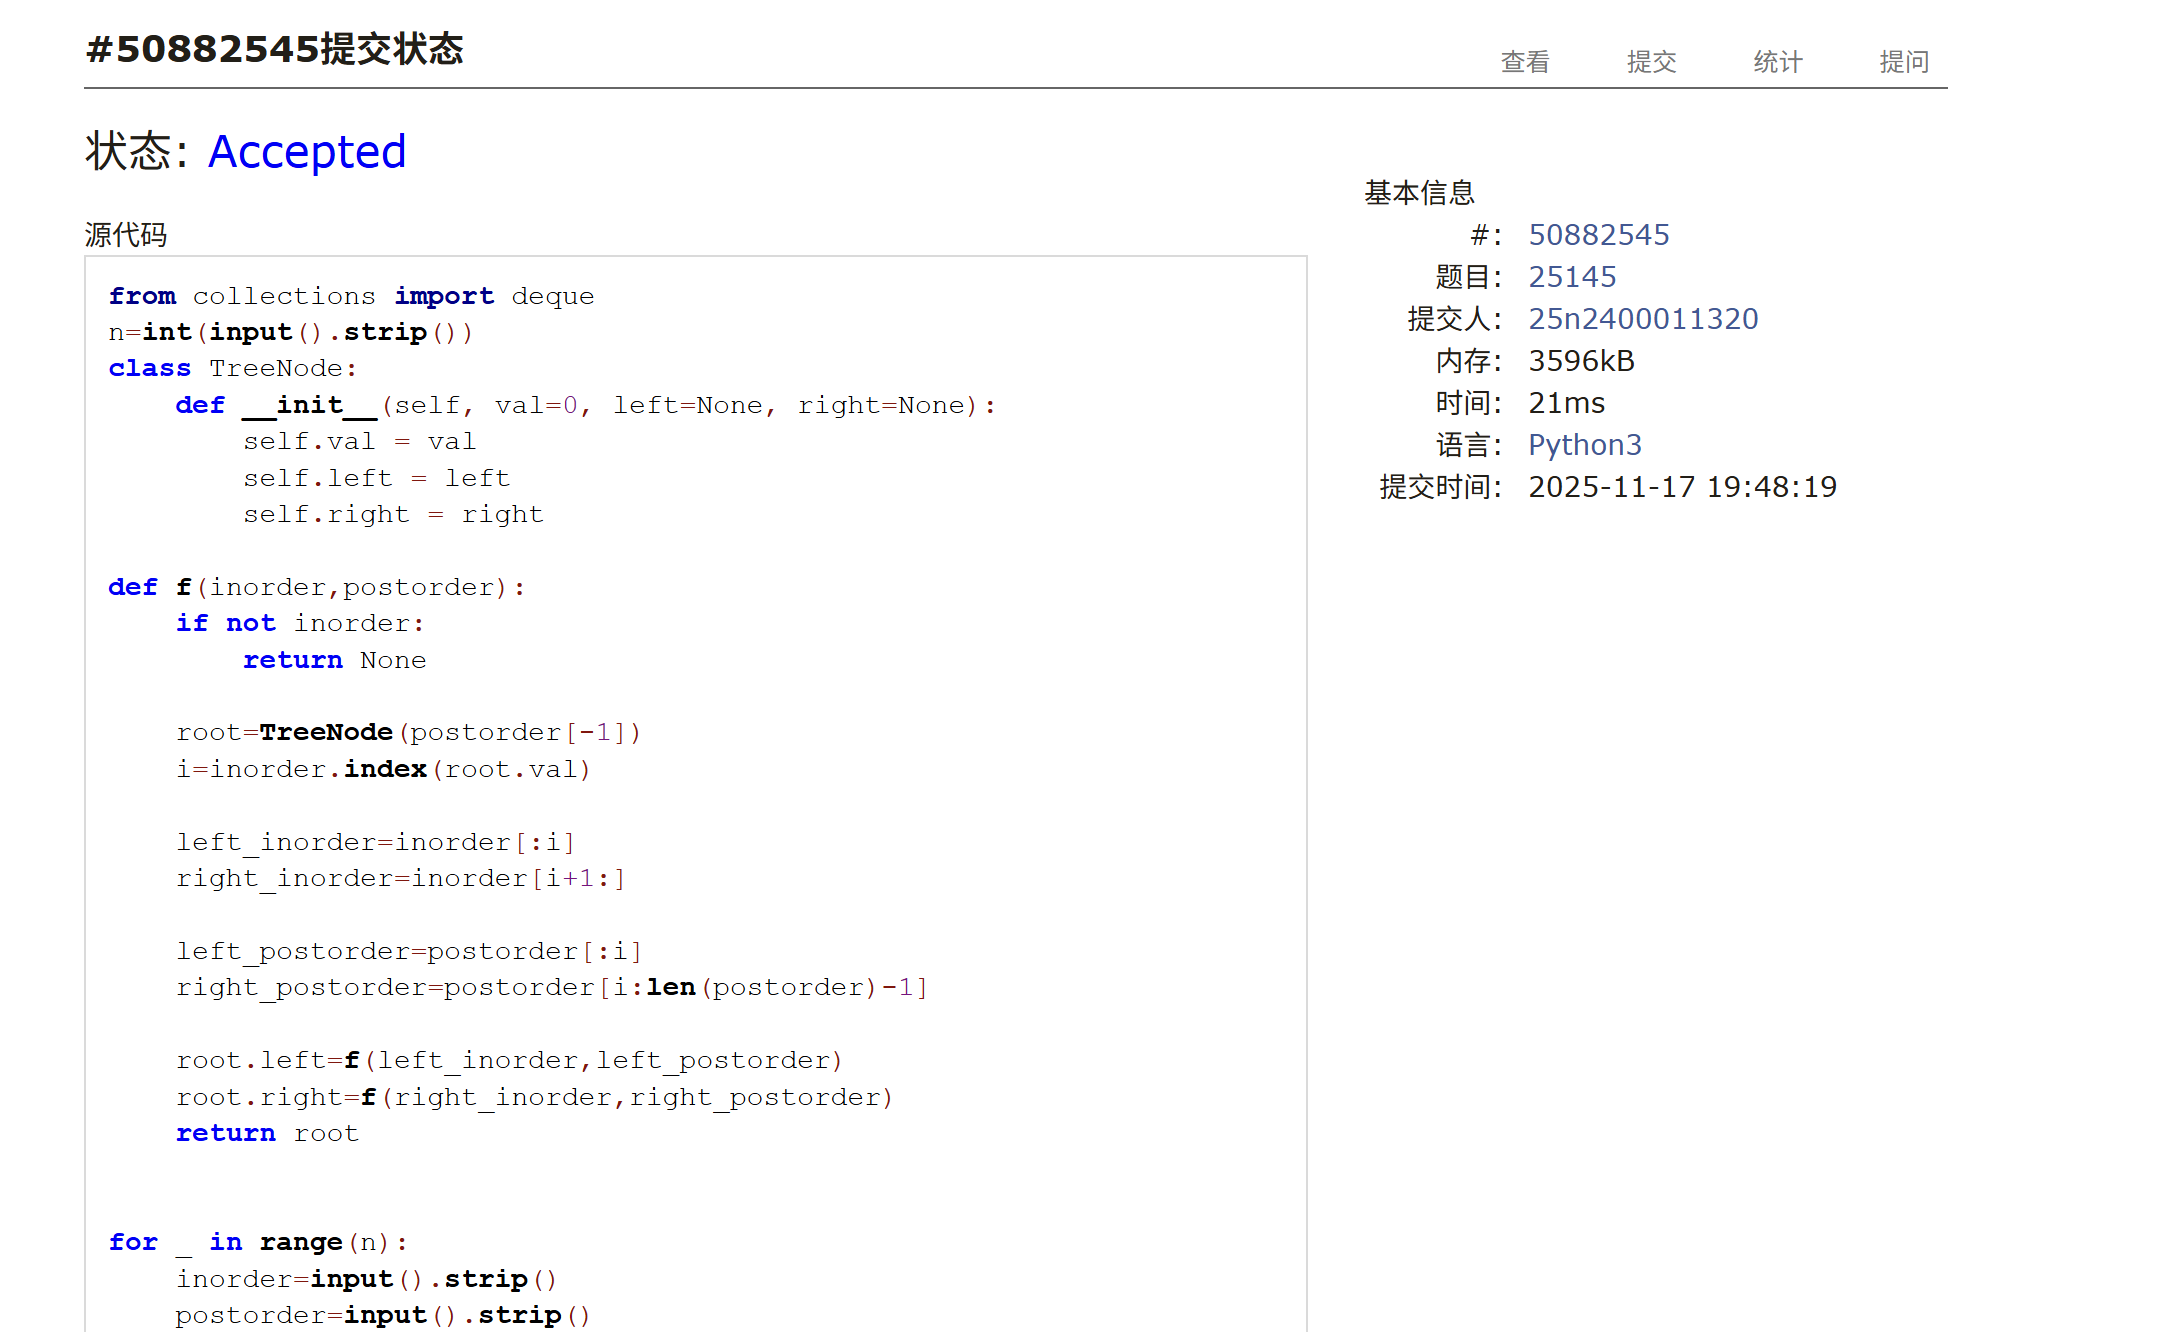




### T20576: printExp（逆波兰表达式建树）

http://cs101.openjudge.cn/practice/20576/

思路：



代码

```python

```



代码运行截图<mark>（至少包含有"Accepted"）</mark>





### T04080:Huffman编码树

greedy, http://cs101.openjudge.cn/practice/04080/

思路：



代码

```python

```



代码运行截图<mark>（至少包含有"Accepted"）</mark>





### M04078: 实现堆结构

http://cs101.openjudge.cn/practice/04078/

要求手搓堆实现。

思路：
使用定义类实现最小堆，核心操作是上浮和下沉，确保父子节点关系


代码：

```python
class MinHeap:
    def __init__(self):
        self.heap = []
    
    def push(self, val):
        self.heap.append(val)
        self._sift_up(len(self.heap) - 1)

    def pop(self):
        if len(self.heap) == 1:
            return self.heap.pop()
        min_val = self.heap[0]
        self.heap[0] = self.heap.pop()
        self._sift_down(0)
        return min_val

    def _sift_up(self, index):
        while index > 0:
            parent_index = (index - 1) // 2
            if self.heap[parent_index] <= self.heap[index]:
                break
            self.heap[parent_index], self.heap[index] = self.heap[index], self.heap[parent_index]
            index = parent_index

    def _sift_down(self, index):
        while True:
            min_index = index
            left_child = 2 * index + 1
            right_child = 2 * index + 2
            if left_child < len(self.heap) and self.heap[left_child] < self.heap[min_index]:
                min_index = left_child
            if right_child < len(self.heap) and self.heap[right_child] < self.heap[min_index]:
                min_index = right_child
            if min_index == index:
                break
            self.heap[index], self.heap[min_index] = self.heap[min_index], self.heap[index]
            index = min_index
            

n = int(input().strip())
heap = MinHeap()
for _ in range(n):
    operation = list(map(int, input().strip().split()))
    if operation[0] == 1:
        heap.push(operation[1])
    if operation[0] == 2:
        print(heap.pop())
```



代码运行截图 <mark>（至少包含有"Accepted"）</mark>
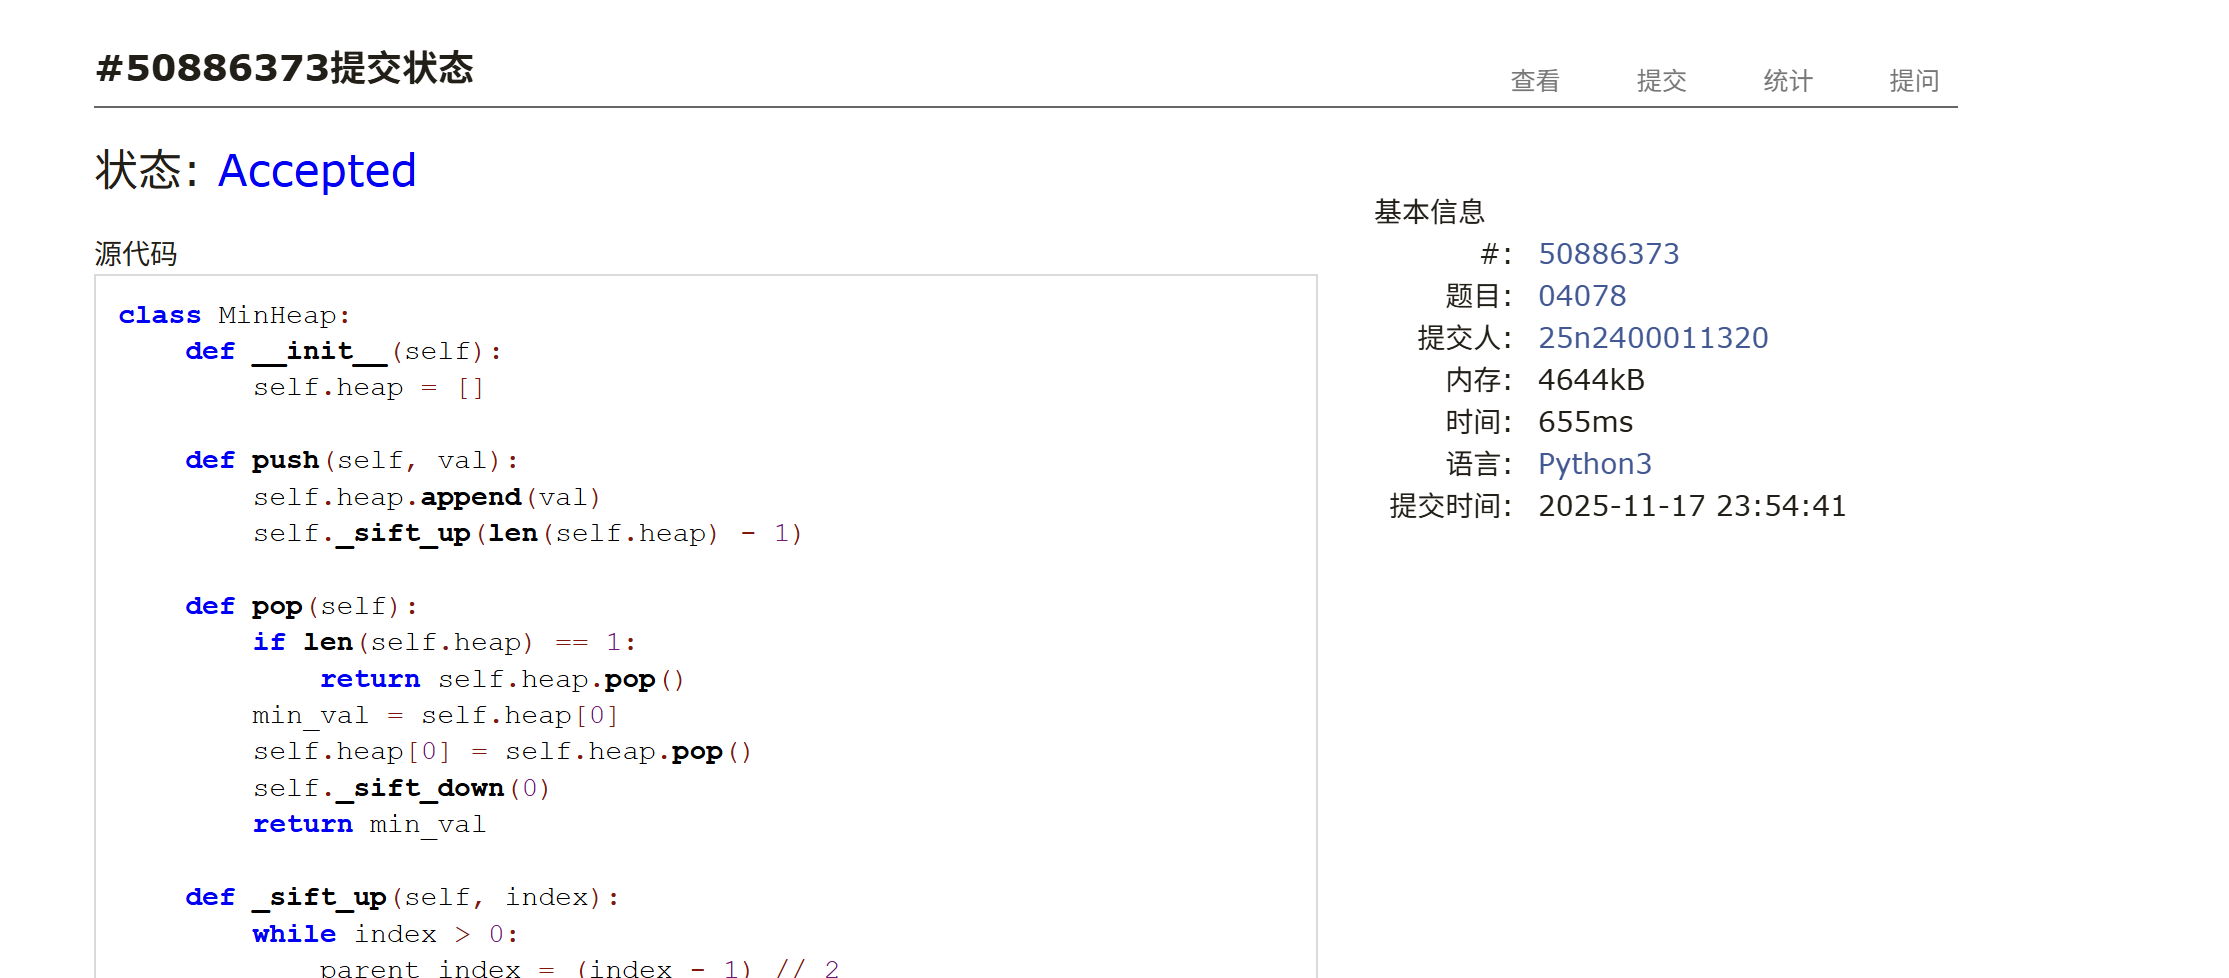


## 2. 学习总结和个人收获

学习了使用树实现各种功能




